# Decision Tree

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from src.decisiontree import DecisionTree
import src.utils as utils

In [2]:
df = pd.read_csv("data/diamonds.csv")
df_copy = df.copy()
X, y, scaler = utils.preprocessing_no_drop(df)
X.shape, y.shape

((46377, 9), (46377,))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 8, 10, 15],}

grid_search = GridSearchCV(DecisionTree(random_state=42), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)
sorted(zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']), reverse=True)

[(0.7553167288430043, {'max_depth': 10}),
 (0.7481201812732935, {'max_depth': 8}),
 (0.7471228476338909, {'max_depth': 15}),
 (0.7374464503189209, {'max_depth': 5}),
 (0.7154793873726888, {'max_depth': 3})]

Seems the optimal max_depth is between 10 and 8

In [5]:
param_grid = {
	'max_depth': [7, 8, 9, 10, 11],
}

grid_search2 = GridSearchCV(DecisionTree(random_state=42), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search2.fit(X_train, y_train)
sorted(zip(grid_search2.cv_results_['mean_test_score'], grid_search2.cv_results_['params']), reverse=True)

[(0.7553167288430043, {'max_depth': 10}),
 (0.7532412970985304, {'max_depth': 11}),
 (0.7504380771257788, {'max_depth': 9}),
 (0.7481201812732935, {'max_depth': 8}),
 (0.7437537606362944, {'max_depth': 7})]

In [6]:
model = DecisionTree(random_state=42, max_depth=10)

In [8]:
model.cross_validation(X_train, y_train, n_splits=5, val_size=0.2)

Performing cross validation


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Cross validation (accuracy) scores:
	mean: 0.753375555855006 std: 0.002923109416619036


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.8s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    2.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished


In [9]:
model.fit(X_train, y_train)

DecisionTree(max_depth=10)

In [10]:
# DEPRECATED, this was for 6 features and depth = 6
# plt.figure(figsize=(170, 20))
# class_names = df_copy["cut"].unique()
# plot_tree(model, feature_names=X_train.columns, class_names=class_names, filled=True, fontsize=10)
# plt.show()

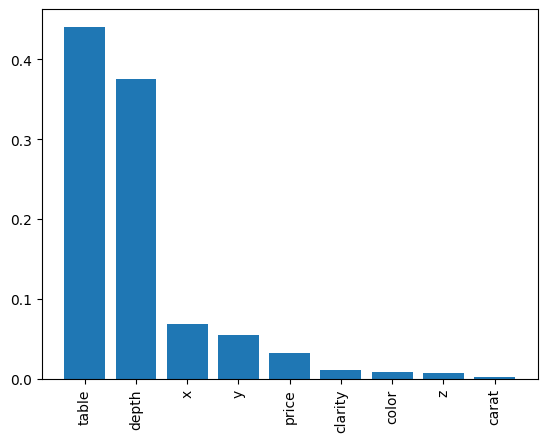

In [11]:
model.importances(features=X_train.columns, show=True)